### **Feature Engineering: Outlier Detection using the Interquartile Range (IQR)**

* As a data scientist, identifying and handling outliers is a key part of the data cleaning process. 

* The Interquartile Range (IQR) is a robust statistical method for finding these extreme values without being heavily influenced by them. 

* In this notebook, we'll apply this method to `employee_salaries.csv` dataset.

* Outliers in this context might represent highly-paid executives (upper outliers) or entry-level interns (lower outliers), or potential data entry errors. 

* The IQR method is a great way to identify these data points programmatically.

##### **The IQR Method:**

* The IQR is the range between the first quartile (Q1) and the third quartile (Q3). 

* An outlier is typically defined as any data point that falls outside the following range:

  * **Lower Limit**: $Q1 - 1.5 \times IQR$
  * **Upper Limit**: $Q3 + 1.5 \times IQR$


### Step 1: Import Libraries and Load Dataset

* We start by importing the necessary libraries: `pandas` for data handling, and `matplotlib` and `seaborn` for visualization. 

* We'll then load our dataset `employee_salaries.csv` and get a first look at the data's structure and descriptive statistics.

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('employee_salaries.csv')

print("--- First 5 rows of the dataset ---")
df.head()

--- First 5 rows of the dataset ---


,employee_id,department,salary_in_k
0,E001,IT,60
1,E002,HR,55
2,E003,Finance,70
3,E004,IT,65
4,E005,Marketing,50


In [4]:
print("\n--- Descriptive statistics of salaries ---")
df['salary_in_k'].describe()


--- Descriptive statistics of salaries ---


count    205.000000
mean      61.843902
std       11.990397
min        5.000000
25%       56.000000
50%       61.000000
75%       67.000000
max      150.000000
Name: salary_in_k, dtype: float64

### Step 2: Visualize the Data with a Box Plot

* A box plot is the ideal visualization for the IQR method because it's built directly on the concepts of quartiles and whiskers. 

* The points that fall outside these whiskers are visually flagged as potential outliers.

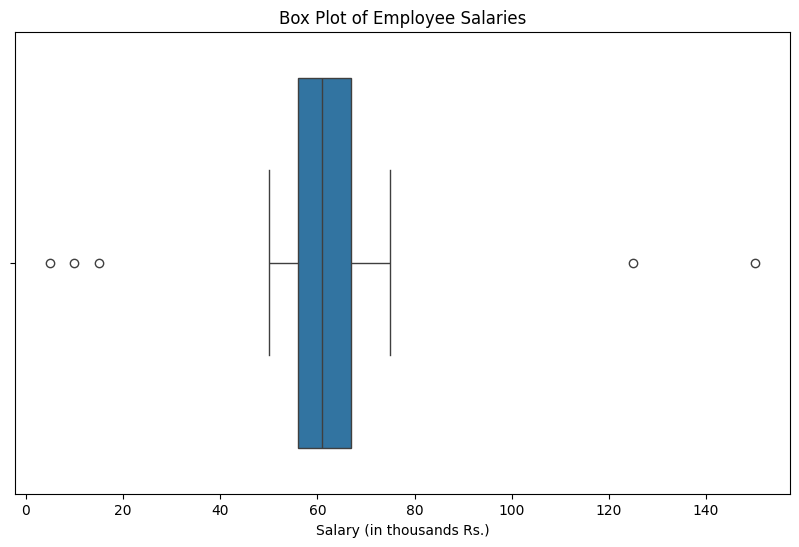

In [6]:
# Box Plot to visualize the salary distribution and potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_in_k'])
plt.title('Box Plot of Employee Salaries')
plt.xlabel('Salary (in thousands Rs.)')
plt.show()

### Step 3: Calculate IQR and Outlier Limits

* Now we will calculate the first quartile (Q1), the third quartile (Q3), and the Interquartile Range (IQR). 

* We'll then use the IQR to define the specific numerical thresholds for our outliers.

In [7]:
# Calculate Q1 and Q3
Q1 = df['salary_in_k'].quantile(0.25)
Q3 = df['salary_in_k'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f}k")
print(f"Q3 (75th percentile): {Q3:.2f}k")
print(f"IQR: {IQR:.2f}k")

Q1 (25th percentile): 56.00k
Q3 (75th percentile): 67.00k
IQR: 11.00k


In [8]:
# Calculate the lower and upper limits for outlier detection
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"\nLower Limit: {lower_limit:.2f}k")
print(f"Upper Limit: {upper_limit:.2f}k")


Lower Limit: 39.50k
Upper Limit: 83.50k


### Step 4: Identify and Remove Outliers

* Using the calculated limits, we can now filter our DataFrame to identify the outliers. 

* We will then create a new DataFrame that excludes these data points, leaving us with a cleaner dataset.

In [10]:
# Display the outliers
outliers = df[(df['salary_in_k'] < lower_limit) | (df.salary_in_k > upper_limit)]
print("--- Identified Outliers ---")
outliers

--- Identified Outliers ---


,employee_id,department,salary_in_k
200,E201,IT,15
201,E202,Finance,125
202,E203,IT,10
203,E204,Marketing,5
204,E205,HR,150


In [11]:
# Create a new DataFrame with outliers removed
df_no_outlier = df[(df['salary_in_k'] >= lower_limit) & (df['salary_in_k'] <= upper_limit)]

print("\nOriginal DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_no_outlier.shape)


Original DataFrame shape: (205, 3)
Cleaned DataFrame shape: (200, 3)


In [ ]:
# First five rows of the clean dataset
df_no_outlier.head()

,employee_id,department,salary_in_k
0,E001,IT,60
1,E002,HR,55
2,E003,Finance,70
3,E004,IT,65
4,E005,Marketing,50


### Step 5: Re-visualize and Summarize

* To confirm our work, we will create a new box plot for the cleaned data. 

* This final visualization should show a more concentrated distribution with the extreme values successfully removed.

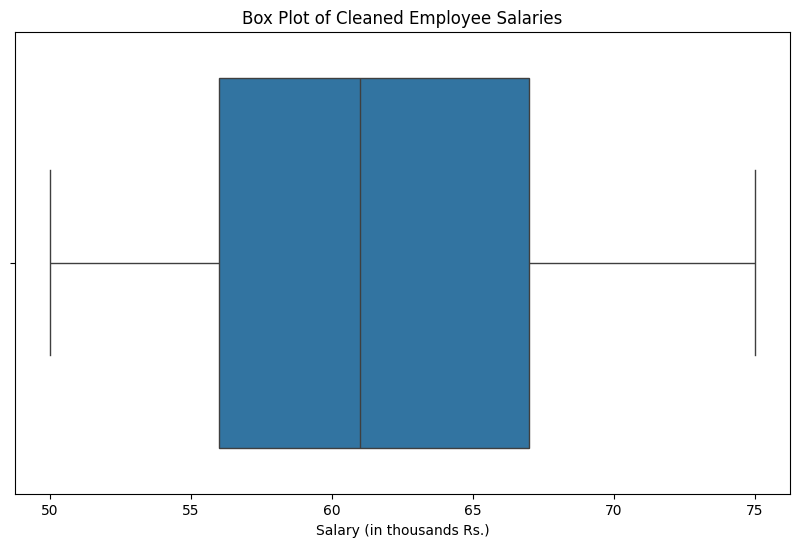

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outlier['salary_in_k'])
plt.title('Box Plot of Cleaned Employee Salaries')
plt.xlabel('Salary (in thousands Rs.)')
plt.show()

In [18]:
print("\n--- Descriptive statistics for the cleaned data ---")
df_no_outlier['salary_in_k'].describe()


--- Descriptive statistics for the cleaned data ---


count    200.000000
mean      61.865000
std        6.893065
min       50.000000
25%       56.000000
50%       61.000000
75%       67.000000
max       75.000000
Name: salary_in_k, dtype: float64

### Summary

* In this notebook, we successfully applied the Interquartile Range (IQR) method to detect and remove outliers from a dataset of employee salaries. We learned how to:

  * Use a box plot to visually inspect for outliers.
  * Calculate Q1, Q3, and the IQR to set a statistical range for normal data points.
  * Identify and filter out data points that fell outside the calculated limits.
  * Confirm the removal of outliers with a final visualization and shape comparison, leading to a cleaner, more representative dataset for further analysis.

---

#### **Exercise: Outlier Detection and Removal using Quantile, Standard Deviation, Z-score and IQR Methods**

#### Problem Statement: Outlier Detection and Removal using various methods

* You have been provided with a dataset `customer_profile.csv` containing features such as `Age`, `Income`, and `Spending_Score`. 

* Your task is to identify and remove outliers from these features using multiple data cleaning methods. 

**Tasks to be Performed:**

1.  **Quantile Method:** Remove the most extreme outliers using the `[0.001, 0.999]` percentile range on the `Income` feature.
2.  **Standard Deviation Method:** Apply the Standard Deviation method with a threshold of 3 on the `Spending_Score` feature.
3.  **Z-Score Method (Manual):** Calculate Z-scores manually and use a threshold of `|Z| > 3` to remove outliers from the `Age` feature.
4.  **Interquartile Range (IQR) Method:** Use the IQR method to identify and remove outliers from the `Income` feature.
5.  **Visualize and Compare:** Use plots to visualize the data distribution before and after each method to understand the effect of outlier removal.

---

* Donwload Dataset:  [customer_profile.csv](https://raw.githubusercontent.com/prakash-ukhalkar/ML/refs/heads/main/07_Feature_Engineering_ML/01_Exercise_Feature_Engineering_ML/customer_profile.csv)
* Solution : [Exercise - Outlier Detection and Removal using Quantile, Standard Deviation, Z-score and IQR Methods](https://github.com/prakash-ukhalkar/ML/blob/main/07_Feature_Engineering_ML/01_Exercise_Feature_Engineering_ML/03_Exercise_Outlier_Detection_Removal_IQR_ML.ipynb)

---